In [ ]:
# Event triggering
Antimony based model with event triggered at certain event times.
The event times occur at exactly the same timepoint, which can be problematic.

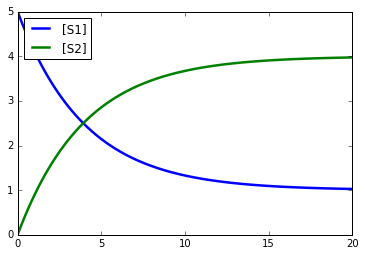

In [3]:
%matplotlib inline
import tellurium as te
from tellurium.widgets import ParameterSlider

model = '''
      model pathway()
        S1 -> S2; k1*S1 - k2*S2 # Reversible term added here

        # Initialize values
        S1 = 5; S2 = 0;
        k1 = 0.1;  k2 = 0.05;

      end
'''
r = te.loadAntimonyModel(model)
ParameterSlider(r, paramIds=['k1'])

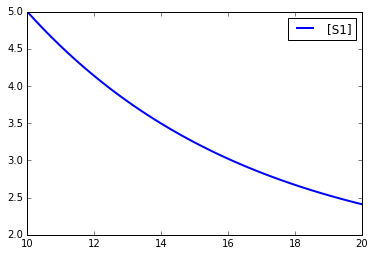

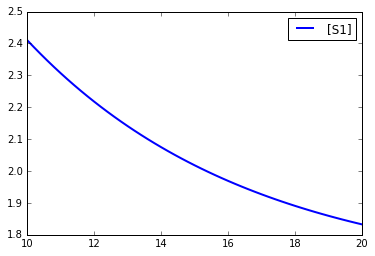

RuntimeError: could not convert Python type to built in type

In [14]:
model = '''
      model pathway()
        S1 -> S2; k1*S1 - k2*S2 # Reversible term added here

        # Initialize values
        S1 = 5; S2 = 0;
        k1 = 0.1;  k2 = 0.05;

      end
'''
r = te.loada(model)
# works
r.selections = ["time", "[S1]"]
s = r.simulate(10, 20)
r.plot()
# works
s = r.simulate(10, 20, ["time", "[S1]"])
r.plot()
#fails
s = r.simulate(10, 20, selections= ["time", "[S1]"])
r.plot()



In [ ]:
from __future__ import print_function, division

import tellurium as te
import roadrunner
from roadrunner import SelectionRecord
import itertools

# Model definition via antimony.
# The model contains an Event triggered at t=2 [s].
r = te.loada("""
    model event_time()
    // Reactions
    J0: $PP_S -> 2 S3; K1 * PP_S;

    // Species initializations:
    var species S3;
    var species S4;
    S3 = 0.5;
    PP_S = 0.0;
    S4 := 2*S3;

    // Rule for S1
    K1 = 0.5;    
    
    // Additional events for triggering re-integration
    E1: at(time>=2):  S3=5;  
    end
""")

r.selections = ['time'] + r.model.getBoundarySpeciesIds() + r.model.getFloatingSpeciesIds() + r.model.getReactionIds()
print(r.selections)
integrator = r.getIntegrator()
print(r.getSettings())

integrator.setSetting(absolute_tolerance)
absTol = 1E-6 * min(r.model.getCompartmentVolumes())
relTol = 1E-6

r.reset()
r.reset(SelectionRecord.ALL)
r.reset(SelectionRecord.INITIAL_GLOBAL_PARAMETER)
s = r.simulate(0, 7, absolute=absTol, relative=relTol, variableStep=True, stiff=True, plot=True)
print(s)